In [1]:
import pandas as pd
import numpy as np


In [29]:
data=pd.read_csv("C:\\Users\\Ahmad\\Desktop\\presentation\\projects\\project\\50_startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [20]:
data.shape

(50, 5)

In [21]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [15]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [3]:
#statistical summary
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
#create a correlation
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0, 0.5, 'Profit')

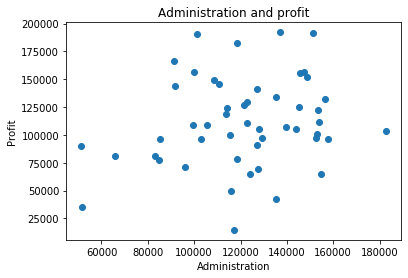

In [7]:
plt.scatter(data['Administration'],data['Profit'])
plt.title('Administration and profit')
plt.xlabel('Administration')
plt.ylabel('Profit')

Text(0, 0.5, 'Marketing Spend')

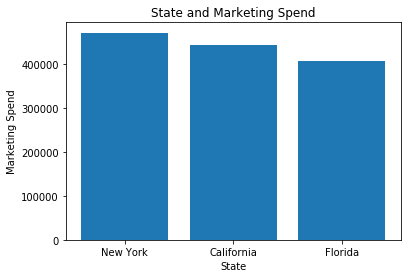

In [10]:
plt.bar(data['State'],data['Marketing Spend'])
plt.title('State and Marketing Spend')
plt.xlabel('State')
plt.ylabel('Marketing Spend')

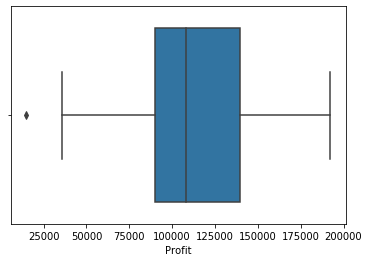

In [11]:
sns.boxplot(x='Profit',data=data)

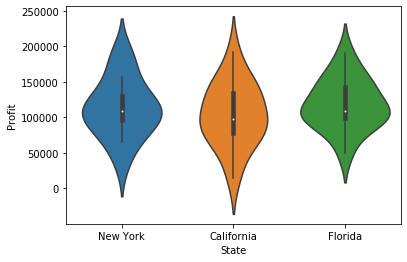

In [12]:
sns.violinplot(x='State',y='Profit',data=data)

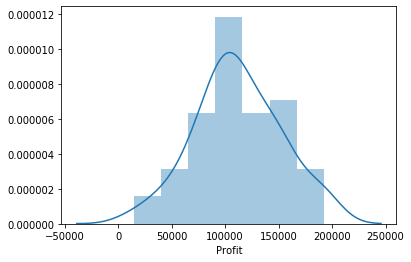

In [18]:
sns.distplot(data['Profit'])

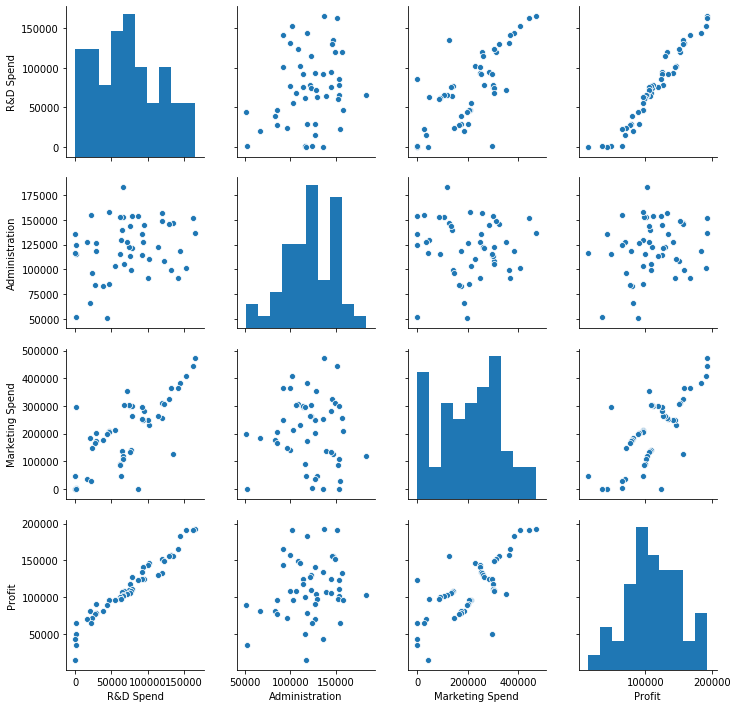

In [19]:
sns.pairplot(data)

In [31]:
data=pd.get_dummies(data,drop_first=True)

In [32]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [38]:
features=['R&D Spend', 'Administration', 'Marketing Spend',
       'State_Florida', 'State_New York']
x=data[features]
y=data['Profit']

In [39]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [40]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
y_pred=linear_model.predict(x_test)

In [43]:
y_pred=linear_model.predict(x_test)

In [44]:
y_test[:5]

9     149759.96
36     90708.19
44     65200.33
16    126992.93
26    105733.54
Name: Profit, dtype: float64

In [45]:
y_pred[:5]

array([154309.70854153,  74357.86385518,  63321.72772573, 116282.98647386,
       109408.6242775 ])

In [47]:
r2_score(y_test,y_pred)

0.9298702261958303

In [48]:
data.insert(4,'Predicitons',linear_model.predict(x))
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Predicitons,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,194937.039380,0,1
1,162597.70,151377.59,443898.53,191792.06,189023.621139,0,0
2,153441.51,101145.55,407934.54,191050.39,181695.414422,1,0
3,144372.41,118671.85,383199.62,182901.99,175834.450022,0,1
4,142107.34,91391.77,366168.42,166187.94,171557.328126,1,0


In [53]:
#save to use in POWER BI
data.to_csv('C://Users//Ahmad//Desktop//presentation//projects//full_data.csv')